# Análisis exploratorio

In [1]:
# Números
import pandas as pd
import numpy as np

# Visualizaciones
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 12
import seaborn as sns
sns.set_style("darkgrid")
mpl.style.use('ggplot')
import squarify

# Paletas
from matplotlib.colors import ListedColormap
from palettable.wesanderson import FantasticFox1_5, Moonrise5_6

import ast

In [2]:
path_original = "..\\data\\original\\"
path_proc =  "..\\data\\processed\\"
path_ext = "..\\data\\external\\"

Wes palettes python: https://jiffyclub.github.io/palettable/wesanderson/

In [3]:
# Paletas a usar: contínua y discreta
FFox = FantasticFox1_5.mpl_colors # callable
FFoxC = FantasticFox1_5.mpl_colormap
FFoxD = ListedColormap(FantasticFox1_5.mpl_colors)

Moon = Moonrise5_6.mpl_colors # callable
MoonC =  Moonrise5_6.mpl_colormap
MoonD = ListedColormap( Moonrise5_6.mpl_colors)

## Datasets de trabajo

In [4]:
# Datos
data = pd.read_csv(path_proc + "data_clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13470 entries, 0 to 13469
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13470 non-null  int64  
 1   REGION    13470 non-null  int64  
 2   SEX       13470 non-null  int64  
 3   AHEIGHT   13470 non-null  float64
 4   AWEIGHTP  13470 non-null  float64
 5   BMI       13470 non-null  float64
 6   AGE_P     13470 non-null  int64  
 7   RACERPI2  13470 non-null  int64  
 8   R_MARITL  13470 non-null  float64
 9   DOINGLWA  13470 non-null  float64
 10  WRKLYR4   13470 non-null  float64
 11  HYPYR1    13470 non-null  float64
 12  HYPMED2   13470 non-null  float64
 13  CHLYR     13470 non-null  float64
 14  CHLMDNW2  13470 non-null  float64
 15  ANGEV     13470 non-null  float64
 16  MIEV      13470 non-null  float64
 17  HRTEV     13470 non-null  float64
 18  STREV     13470 non-null  float64
 19  EPHEV     13470 non-null  float64
 20  COPDEV    13470 non-null  fl

In [18]:
# Metadata
meta = pd.read_csv(path_ext + "feat_metadata.csv", sep=";")
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      47 non-null     object
 1   question  47 non-null     object
 2   levels    37 non-null     object
 3   tipo      47 non-null     object
 4   category  47 non-null     object
 5   temp      46 non-null     object
 6   object    47 non-null     object
dtypes: object(7)
memory usage: 2.7+ KB


In [6]:
meta.category.unique()

array(['id', 'entorno', 'sujeto', 'antecedentes', 'medicamentos',
       'enfermedades crónicas', 'hábitos', 'target'], dtype=object)

# Distribución de la variable target

## Balanceo del dataset

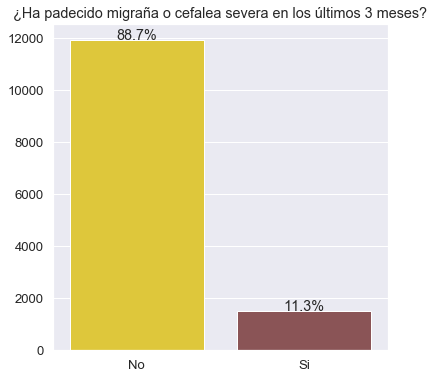

In [7]:
sns.set(rc={"figure.figsize": (6, 6)})
sns.set(font_scale = 1.2)

# Plot
g = sns.countplot(x="target", data=data, palette = FFox)
    
# Axis level
g.title.set_text("¿Ha padecido migraña o cefalea severa en los últimos 3 meses?")
g.set(ylabel="", xlabel="")
g.set(xticklabels=["No","Si"])

for p in g.patches:
        total=len(data)
        width = p.get_width()
        height = p.get_height()
        g.text(p.get_x() + width/2,
            height,
            str(round((height/total)*100,1)) + "%",
            ha="center"
            )

In [8]:
g.figure.savefig("..\\figures\\distr_target.png", dpi=150, bbox_inches='tight')

## Variables relacionadas al entorno

In [9]:
meta[meta.category == "entorno"]

,code,question,levels,tipo,category,temp,object
1,REGION,Región de USA en la que habita el individuo,"['Noreste','Centro-Oeste','Sur','Oeste']",discreta,entorno,presente,category
8,R_MARITL,Estado civil,"['Casado','Viudo','Separado','Soltero','En Par...",discreta,entorno,presente,category
9,DOINGLWA,¿Trabaja actualmente?,"['No','Sí']",discreta,entorno,presente,bool
10,WRKLYR4,¿Trabajó en los últimos 12 meses?,"['No','Sí']",discreta,entorno,12 meses,bool


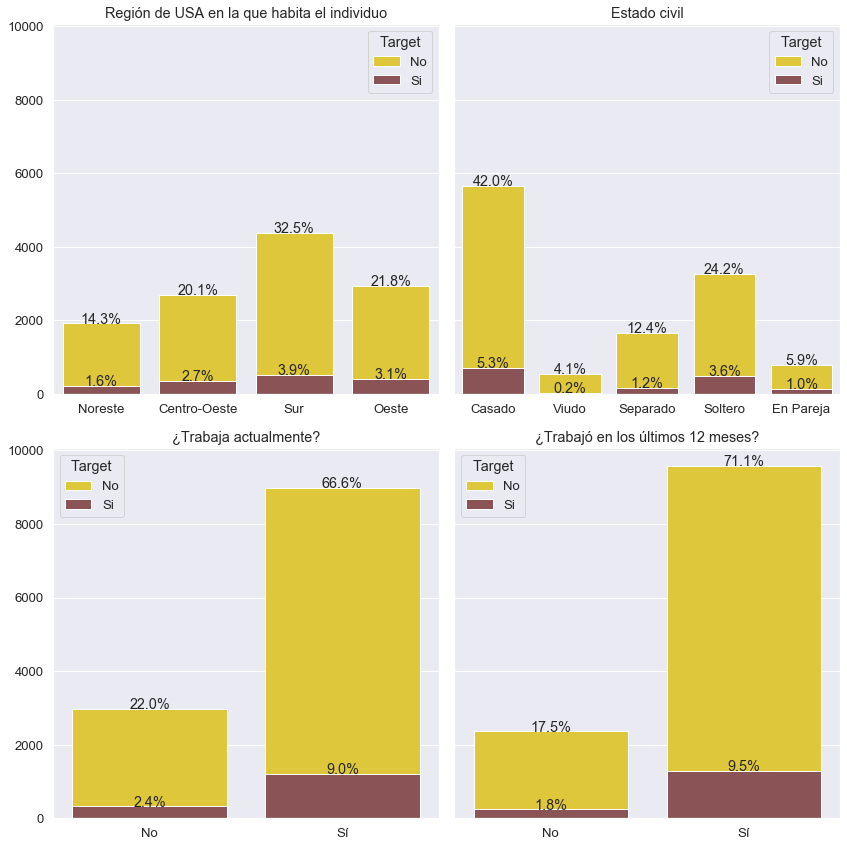

In [10]:
# Selección de variables
selection = meta.loc[(meta.tipo == "discreta") & meta.category.isin(["entorno","target"]) == True, ["code","question","levels","tipo"]]

# Dataset
temp = data[list(selection.code)]

sns.set(rc={"figure.figsize": (12, 12)})
sns.set(font_scale = 1.2)
f, axes = plt.subplots(2, 2, sharey=True)
axes = axes.flatten()

i = 0
for col,question,level in zip(temp.columns[:-1], selection.question, selection.levels):
    
    # Etiquetas para el eje X
    labels_axis = ast.literal_eval(level)
    
    # Etiquetas para el cuadro de referencia
    labels_legend = ["No","Si"]
    
    # Plot
    ax = axes[i]
    g = sns.countplot(data=temp, x=col, hue="target", ax=ax, palette=FFox, dodge=False)
    
    # Axis level
    ax.title.set_text(question)
    ax.set(ylabel="", xlabel="")
    ax.set(xticklabels=labels_axis)
    ax.legend(labels_legend)
    
    # Legend level
    leg = g.get_legend()
    leg.set_title("Target")
    
    # Porcentaje en barras
    for p in g.patches:
        total=len(data)
        width = p.get_width()
        height = p.get_height()
        g.text(p.get_x() + width/2,
            height,
            str(round((height/total)*100,1)) + "%",
            ha="center"
            )
    
    i = i+1
    
plt.tight_layout()

In [11]:
f.savefig("..\\figures\\distr_entorno.png", dpi=150, bbox_inches='tight')

## Variables relacionadas al sujeto

In [12]:
meta.loc[(meta.category.isin(["sujeto","target"]) == True) & (meta.code != "FLA1AR")]

,code,question,levels,tipo,category,temp,object
2,SEX,Sexo,"['Masculino','Femenino']",discreta,sujeto,presente,category
3,AHEIGHT,Altura (cm),NaN,contínua,sujeto,constante,float
4,AWEIGHTP,Peso (Kg),NaN,contínua,sujeto,constante,float
5,BMI,Índice de masa corporal,NaN,contínua,sujeto,constante,float
6,AGE_P,Edad,NaN,contínua,sujeto,presente,float
7,RACERPI2,Etnia,"['Blanco','Afroamericano','AIAN','Asiática','N...",discreta,sujeto,constante,category
47,target,¿Ha tenido migrañas o cefaleas severas en los ...,"['No','Sí']",discreta,target,3 meses,bool


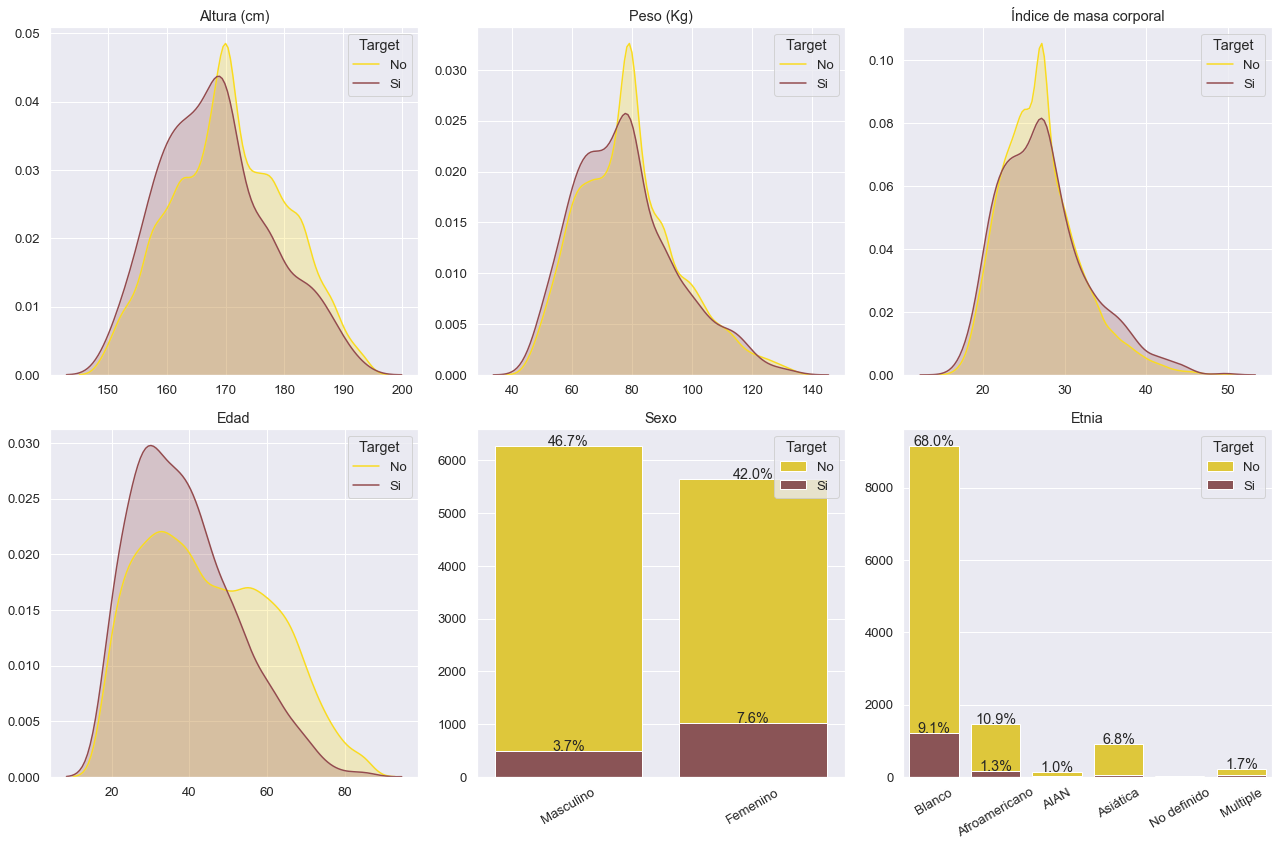

In [13]:
# Selección de variables
selection = meta.loc[meta.category.isin(["sujeto","target"]) == True, ["code","question","levels","tipo"]].sort_values("tipo", ascending="False")

# Dataset
temp = data[list(selection.code)]

sns.set(rc={"figure.figsize": (18, 12)})
sns.set(font_scale = 1.2)
f, axes = plt.subplots(2, 3)
axes = axes.flatten()

i = 0
for col,question,level,tipo in zip(temp.columns[:-1],selection.question,selection.levels,selection.tipo):

    # Etiquetas para el cuadro de referencia
    labels_legend = ["No","Si"]
    
    if i == 6:
        break
        
    if tipo == "discreta":   

        # Etiquetas para el eje X
        labels_axis = ast.literal_eval(level)  

        ax = axes[i]
        g = sns.countplot(data=temp, x=col, hue="target", ax=ax, palette=FFox, dodge=False)

        # Axis level
        ax.title.set_text(question)
        ax.set(ylabel="", xlabel="")
        ax.set_xticklabels(labels=labels_axis, rotation=30)
        ax.legend(labels_legend)

        # Legend level
        leg = g.get_legend()
        leg.set_title("Target")
        
        # Porcentaje en barras
        for p in g.patches:            
            total=len(data)
            width = p.get_width()
            height = p.get_height()
            percentage = round((height/total)*100,1)
            
            if percentage > 0.5:
                g.text(p.get_x() + width/2,
                    height,
                    str(percentage) + "%",
                    ha="center"
                    )
            else:
                    g.text(p.get_x() + width/2,
                    height,
                    "",
                    ha="center"
                    )
                
        
    if tipo == "contínua":   

        ax = axes[i]
        g1 = sns.kdeplot(data.loc[data.target == 0, col], shade=True, ax=ax, color=FFox[0])
        g2 = sns.kdeplot(data.loc[data.target == 1, col], shade=True, ax=ax, color=FFox[1])

        # Axis level
        ax.title.set_text(question)
        ax.set(ylabel="", xlabel="")    
        ax.legend(labels_legend)

        # Legend level
        leg = g1.get_legend()
        leg.set_title("Target")

    i = i+1
        
    
plt.tight_layout()

In [14]:
f.savefig("..\\figures\\distr_sujeto.png", dpi=150, bbox_inches='tight')

## Variables relacionadas a enfermedades crónicas

In [19]:
meta[meta.category.isin(["enfermedades crónicas"]) == True]

,code,question,levels,tipo,category,temp,object
15,ANGEV,¿Algna vez fue diagnosticado con angina pectoris?,"['No','Sí']",discreta,enfermedades crónicas,constante,bool
17,HRTEV,¿Alguna vez fue diagnosticado con una enfermed...,"['No','Sí']",discreta,enfermedades crónicas,constante,bool
19,EPHEV,¿Alguna vez fue diagnosticado con efisema?,"['No','Sí']",discreta,enfermedades crónicas,constante,bool
20,COPDEV,¿Alguna vez fue diagnosticado con EPOC?,"['No','Sí']",discreta,enfermedades crónicas,constante,bool
22,AASSTILL,¿Tiene asma?,"['No','Sí']",discreta,enfermedades crónicas,presente,bool
24,DIBEV1,¿Ha sido diagnosticado alguna vez con diabetes...,"['No','Sí']",discreta,enfermedades crónicas,constante,bool
27,AHAYFYR,¿Ha tenido rinitis alérgica en los últimos 12 ...,"['No','Sí']",discreta,enfermedades crónicas,12 meses,bool
29,CBRCHYR,¿Ha sido diagnosticado con bronquitis crónicae...,"['No','Sí']",discreta,enfermedades crónicas,12 meses,bool
30,KIDWKYR,¿Ha sido diagnosticado con algún tipo de falla...,"['No','Sí']",discreta,enfermedades crónicas,12 meses,bool
31,LIVYR,¿Ha sido diagnosticado con algún tipo de falla...,"['No','Sí']",discreta,enfermedades crónicas,12 meses,bool


In [20]:
selection = meta.loc[
    (meta.tipo == "discreta")
    & (
        meta.category.isin(["enfermedades crónicas", "target"])
        == True
    ),
    ["code", "question", "levels"],
]
temp = data[list(selection.code)]

In [21]:
temp1 = temp[temp.target == 1]

In [22]:
dfs1 = []
for col in temp1.columns[:-1]:
    total = len(temp1)
    positive_cases = len(temp1[temp1[col] == 1])
    perc = str(round(positive_cases*100 / total,2)) + "%"
    values = pd.DataFrame(data=[{"variable":col,"count1":positive_cases, "perc":perc}])
    dfs1.append(values)

temp1_enf = pd.concat(dfs1)
temp1_enf.variable = [
    "Angina Pectoris",
    "Corazón",
    "Efisema",
    "EPOC",
    "Asma",
    "Diabetes",
    "Rinitis Alérgica",
    "Bronquitis",
    "Renal",
    "Hepática",
    "Artritis",
    "Dolor cuello",
    "Dolor cintura",
    "Dolor cara/mandíbula"
]

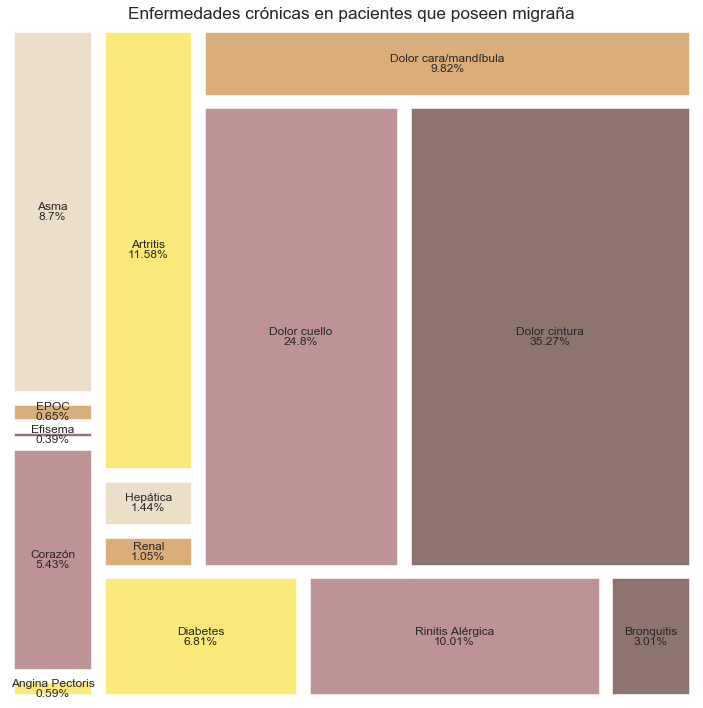

In [54]:
sns.set(rc={"figure.figsize": (10, 10)})
#sns.set(font_scale=1.5)
f, axes = plt.subplots(1, 1)

# Enfermedades crónicas
ax0 = axes
g0 = squarify.plot(
    sizes=temp1_enf.count1,
    label=temp1_enf.variable,
    value=temp1_enf.perc,
    alpha=0.6,
    color=FFox,
    pad=True,
    ax=ax0,
    #text_kwargs={"rotation":45}
)
ax0.axis("off")
ax0.set_title("Enfermedades crónicas en pacientes que poseen migraña", fontsize="x-large")

plt.tight_layout()

In [55]:
f.savefig("..\\figures\\square_enfCronicas.pdf", dpi=150, bbox_inches='tight')

## Variables relacionadas a antecedentes

In [26]:
meta[meta.category.isin(["antecedentes"]) == True]

,code,question,levels,tipo,category,temp,object
11,HYPYR1,¿Ha sufrido hipertemsión en los últimos 12 meses?,"['No','Sí']",discreta,antecedentes,12 meses,bool
13,CHLYR,¿Ha tenido colesterol alto en los últimos 12 m...,"['No','Sí']",discreta,antecedentes,12 meses,bool
16,MIEV,¿Alguna vez tuvo un infarto?,"['No','Sí']",discreta,antecedentes,constante,bool
18,STREV,¿Alguna vez sufrió un derrame cerebral?,"['No','Sí']",discreta,antecedentes,constante,bool
23,ULCYR,¿Ha tenido una úlcera en los últimos 12 meses?,"['No','Sí']",discreta,antecedentes,12 meses,bool
28,SINYR,¿Ha sido diagnosticado con sinusitis en los úl...,"['No','Sí']",discreta,antecedentes,12 meses,bool
41,APOX,¿Ha tenido varicela?,"['No','Sí']",discreta,antecedentes,constante,bool
42,AHEP,¿Ha tenido hepatitis?,"['No','Sí']",discreta,antecedentes,constante,bool
43,LIVEV,¿Ha sido diagnosticado alguna vez con una enfe...,"['No','Sí']",discreta,antecedentes,constante,bool


In [27]:
selection = meta.loc[
    (meta.tipo == "discreta")
    & (
        meta.category.isin(["antecedentes", "target"])
        == True
    ),
    ["code", "question", "levels"],
]
temp = data[list(selection.code)]

In [28]:
temp1 = temp[temp.target == 1]

In [31]:
dfs1 = []
for col in temp1.columns[:-1]:
    total = len(temp1)
    positive_cases = len(temp1[temp1[col] == 1])
    perc = str(round(positive_cases*100 / total,2)) + "%"
    values = pd.DataFrame(data=[{"variable":col,"count1":positive_cases, "perc":perc}])
    dfs1.append(values)

temp1_ant = pd.concat(dfs1)
temp1_ant.variable = [
    "Hipertensión",
    "Colesterol alto",
    "Infarto",
    "Derrame cerebral",
    "Úlcera",
    "Sinusitis",
    "Varicela",
    "Hepatitis",
    "Hepática crónica"
]

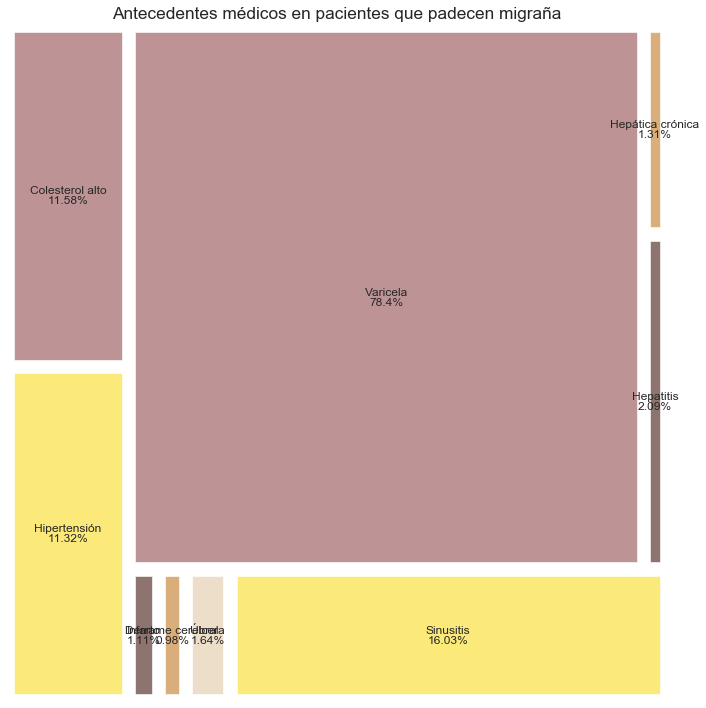

In [52]:
sns.set(rc={"figure.figsize": (10, 10)})
#sns.set(font_scale=1.5)
f, axes = plt.subplots(1, 1)

# Antecedentes
ax1 = axes
g1 = squarify.plot(
    sizes=temp1_ant.count1,
    label=temp1_ant.variable,
    value=temp1_ant.perc,
    alpha=0.6,
    color=FFox,
    pad=True,
    ax=ax1,
)
ax1.axis("off")
ax1.set_title("Antecedentes médicos en pacientes que padecen migraña", fontsize="x-large")

plt.tight_layout()

In [51]:
temp1_ant

,variable,count1,perc
0,Hipertensión,173,11.32%
0,Colesterol alto,177,11.58%
0,Infarto,17,1.11%
0,Derrame cerebral,15,0.98%
0,Úlcera,25,1.64%
0,Sinusitis,245,16.03%
0,Varicela,1198,78.4%
0,Hepatitis,32,2.09%
0,Hepática crónica,20,1.31%


In [53]:
f.savefig("..\\figures\\square_antecedentes.pdf", dpi=150, bbox_inches='tight')

## Variables relacionadas a medicamentos

In [56]:
meta[meta.category == "medicamentos"]

,code,question,levels,tipo,category,temp,object
12,HYPMED2,¿Toma actualmente medicamento para la presión ...,"['No','Sí']",discreta,medicamentos,presente,bool
14,CHLMDNW2,¿Toma actualmente medicamento para reducir el ...,"['No','Sí']",discreta,medicamentos,presente,bool
21,ASP,Toma aspirina actualmente?,"['No','Sí']",discreta,medicamentos,presente,bool
25,DIBPILL1,¿Toma actualmente medicamento para la diabetes?,"['No','Sí']",discreta,medicamentos,presente,bool
26,INSLN1,¿Toma actualmente insulina?,"['No','Sí']",discreta,medicamentos,presente,bool


In [57]:
selection = meta.loc[(meta.tipo == "discreta") & (meta.category.isin(["medicamentos","target"]) == True), ["code","question","levels"]]
temp = data[list(selection.code)]

In [58]:
temp1 = temp[temp.target == 1]

In [59]:
dfs1 = []
for col in temp1.columns[:-1]:
    total = len(temp1)
    positive_cases = len(temp1[temp1[col] == 1])
    perc = str(round(positive_cases*100 / total,2)) + "%"
    values = pd.DataFrame(data=[{"variable":col,"count1":positive_cases, "perc":perc}])
    dfs1.append(values)

temp1_med = pd.concat(dfs1)
temp1_med.variable = ["Hipertensión","Colesterol","Aspirina","Diabetes","Insulina"]

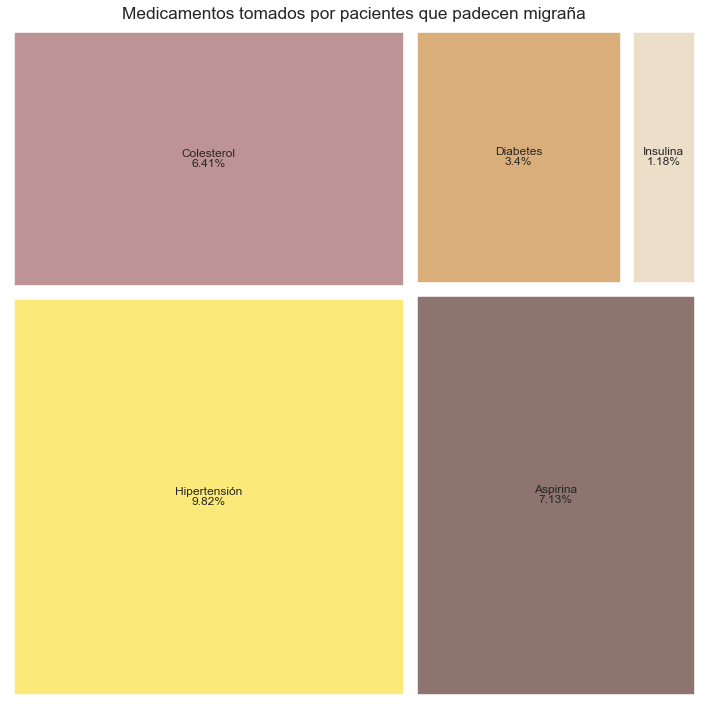

In [69]:
sns.set(rc={"figure.figsize": (10, 10)})
#sns.set(font_scale=1.5)
f, axes = plt.subplots(1, 1)

# Medicamentos
ax2 = axes
g2 = squarify.plot(
    sizes=temp1_med.count1,
    label=temp1_med.variable,
    value=temp1_med.perc,
    alpha=0.6,
    color=FFox,
    pad=True,
    ax=ax2,
)
ax2.axis("off")
ax2.set_title("Medicamentos tomados por pacientes que padecen migraña", fontsize="x-large")

plt.tight_layout()

In [70]:
f.savefig("..\\figures\\square_medicamentos.pdf", dpi=150, bbox_inches='tight')

## Variables relacionadas a hábitos

In [62]:
meta[meta.category == "hábitos"]

,code,question,levels,tipo,category,temp,object
37,CIGSDAY,Números de cigarrillo que fuma al día (todo ti...,NaN,contínua,hábitos,presente,float
38,VIG,¿Cuántos minutos a la semana realiza de ejerci...,NaN,contínua,hábitos,presente,float
39,MOD,¿Cuántos minutos a la semana realiza de ejerci...,NaN,contínua,hábitos,presente,float
40,ALC,En promedio ¿Cuántos vasos de alcohol bebe a l...,NaN,contínua,hábitos,12 meses,float
44,ASICPUSE,¿Con qué frecuencia utiliza una computadora?,"['Nunca o casi nunca','A veces','Casi todos lo...",discreta,hábitos,constante,category
45,ASISLEEP,En promedio y en un periodo de 24 horas ¿Cuánt...,NaN,contínua,hábitos,24 horas,float


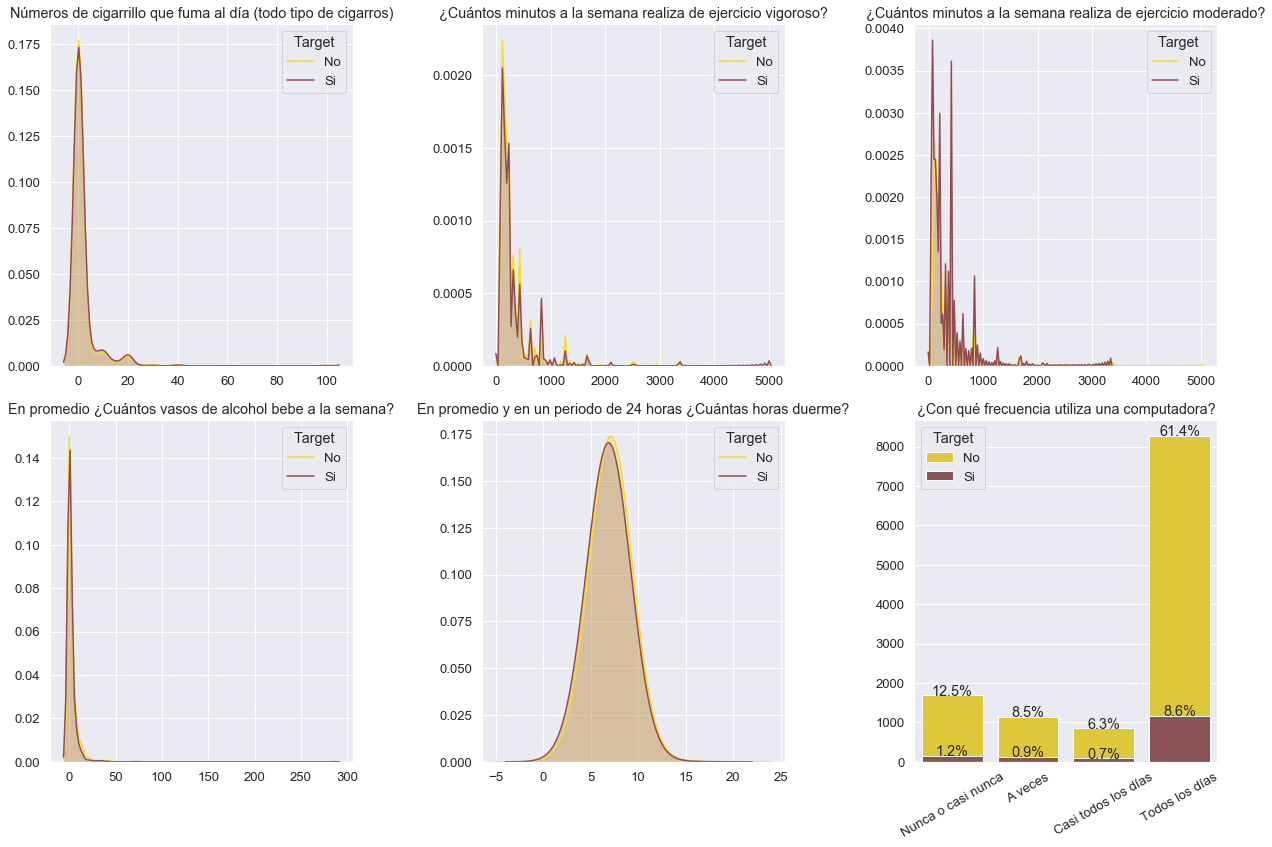

In [74]:
# Selección de variables
selection = meta.loc[meta.category.isin(["hábitos","target"]) == True, ["code","question","levels","tipo"]].sort_values("tipo")

# Dataset
temp = data[list(selection.code)]

sns.set(rc={"figure.figsize": (18, 12)})
sns.set(font_scale = 1.2)
f, axes = plt.subplots(2, 3)
axes = axes.flatten()

i = 0
for col,question,level,tipo in zip(temp.columns,selection.question,selection.levels,selection.tipo):  
    
    # Etiquetas para el cuadro de referencia
    labels_legend = ["No","Si"]  
    
    if i == 6:
        break
    
    if tipo == "contínua":       

        ax = axes[i]
        g1 = sns.kdeplot(data.loc[data.target == 0, col], shade=True, ax=ax, color=FFox[0], bw=2)
        g2 = sns.kdeplot(data.loc[data.target == 1, col], shade=True, ax=ax, color=FFox[1], bw=2)

        # Axis level
        ax.title.set_text(question)
        ax.set(ylabel="", xlabel="")    
        ax.legend(labels_legend)

        # Legend level
        leg = g1.get_legend()
        leg.set_title("Target")

        i = i+1
    
    if tipo == "discreta":
        
        # Etiquetas para el eje X
        labels_axis = ast.literal_eval(level)

        # Plot
        ax = axes[i]
        g = sns.countplot(data=temp, x=col, hue="target", ax=ax, palette=FFox, dodge= False)

        # Axis level
        ax.title.set_text(question)
        ax.set(ylabel="", xlabel="")
        ax.set_xticklabels(labels=labels_axis, rotation=30)
        ax.legend(labels_legend)

        # Legend level
        leg = g.get_legend()
        leg.set_title("Target")
        
        # Porcentaje en barras
        for p in g.patches:            
            total=len(temp)
            width = p.get_width()
            height = p.get_height()
            percentage = round((height/total)*100,1)
            g.text(p.get_x() + width/2,
                    height,
                    str(percentage) + "%",
                    ha="center"
                    )



        i = i+1
    
plt.tight_layout()

In [75]:
f.savefig("..\\figures\\distr_hábitos.png", dpi=150, bbox_inches='tight')

# Correlación entre variables

In [84]:
# Lista de variables contínuas
cont_list = list(meta.loc[meta.tipo == "contínua","code"])
# Se conservan sólo las variables contínuas
data_cont = data[cont_list]

In [85]:
data_cont

,AHEIGHT,AWEIGHTP,BMI,AGE_P,CIGSDAY,VIG,MOD,ALC,ASISLEEP
0,170.18,78.9,27.24,29,0.0,120.0,210.0,0.0,7.0
1,165.10,104.3,38.26,54,0.0,0.0,0.0,0.0,6.0
2,170.18,78.9,27.24,85,8.0,210.0,210.0,0.0,8.0
3,157.48,63.5,25.60,28,0.0,180.0,120.0,2.0,7.0
4,180.34,72.6,22.32,65,20.0,450.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...
13465,170.18,79.4,27.42,30,0.0,20.0,30.0,0.0,7.0
13466,170.18,74.8,25.83,34,0.0,60.0,30.0,6.0,8.0
13467,157.48,49.9,20.12,20,0.0,0.0,30.0,0.0,9.0
13468,157.48,56.7,22.86,20,0.0,240.0,60.0,0.0,8.0


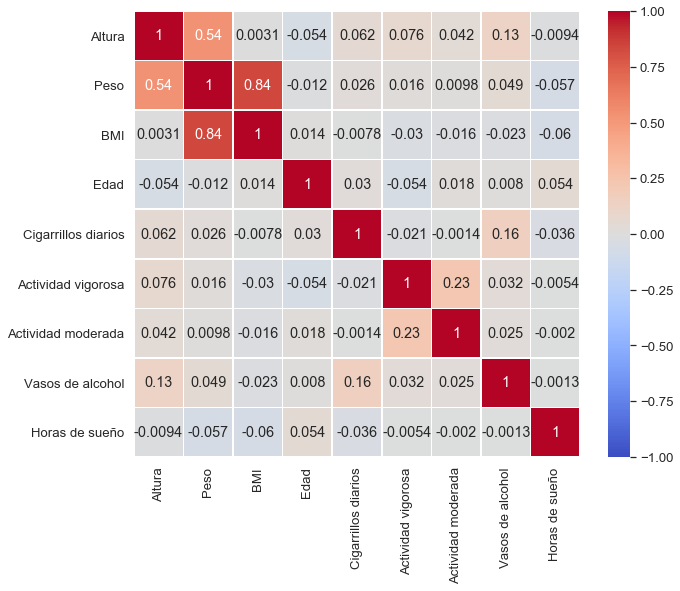

In [114]:
# Compute the correlation matrix
corr = data_cont.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.82},
    annot=True,
    xticklabels=[
        "Altura",
        "Peso",
        "BMI",
        "Edad",
        "Cigarrillos diarios",
        "Actividad vigorosa",
        "Actividad moderada",
        "Vasos de alcohol",
        "Horas de sueño",
    ],
    yticklabels=[
        "Altura",
        "Peso",
        "BMI",
        "Edad",
        "Cigarrillos diarios",
        "Actividad vigorosa",
        "Actividad moderada",
        "Vasos de alcohol",
        "Horas de sueño",
    ],
)

In [115]:
f.savefig("..\\figures\\correlacion.png", dpi=150, bbox_inches='tight')